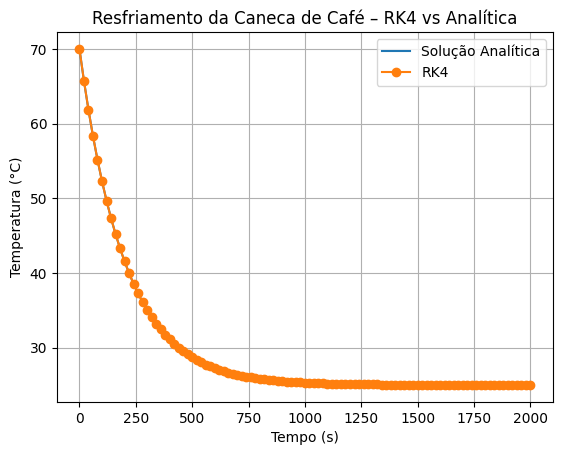

In [ ]:
#Solução Numérica com Runge-Kutta de quarta ordem (RK4)

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Função que define a EDO
# -----------------------------
def dT_dt(T, t, k, T_amb):
    return -k * (T - T_amb)

# -----------------------------
# Parâmetros do problema
# -----------------------------
T_amb = 25      # Temperatura ambiente (°C)
T0 = 70         # Temperatura inicial do café (°C)
k = 0.005       # Taxa de resfriamento (1/s)
dt = 20         # Passo de tempo (s)
t_max = 2000    # Tempo máximo (s)

# Cria vetor de tempo
t = np.arange(0, t_max+dt, dt)

# Inicializa vetor de temperatura
T_rk4 = np.zeros(len(t))
T_rk4[0] = T0

# -----------------------------
# Método RK4
# -----------------------------
for i in range(1, len(t)):
    ti = t[i-1]
    Ti = T_rk4[i-1]
    
    k1 = dT_dt(Ti, ti, k, T_amb)
    k2 = dT_dt(Ti + 0.5 * dt * k1, ti + 0.5 * dt, k, T_amb)
    k3 = dT_dt(Ti + 0.5 * dt * k2, ti + 0.5 * dt, k, T_amb)
    k4 = dT_dt(Ti + dt * k3, ti + dt, k, T_amb)
    
    T_rk4[i] = Ti + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

# -----------------------------
# Solução Analítica para comparação
# -----------------------------
T_analitica = T_amb + (T0 - T_amb) * np.exp(-k * t)

# -----------------------------
# Plot
# -----------------------------
plt.plot(t, T_analitica, label='Solução Analítica')
plt.plot(t, T_rk4, 'o-', label='RK4')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Resfriamento da Caneca de Café – RK4 vs Analítica')
plt.legend()
plt.grid(True)
plt.show()

